MLP Model 1 (32 nodes, 2 layers)


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 492.2776 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 224.5163  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 233.6701  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 334.1658  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 295.7951 
MLP Model 2 (32 nodes, 4 layers)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.4652
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.1377 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3030  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.1531  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.0837
MLP Model 3 (1024 nodes, 2 layers)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1352 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 60.9759 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2588 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6424 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.0206 
MLP Model 4 (1024 nodes, 4 layers)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.5742 
4/4 ━━━━━━━━━━━━━━

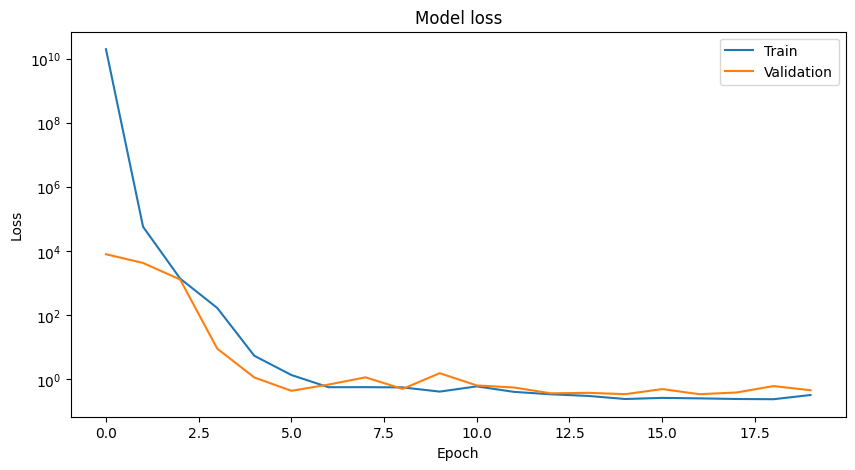

In [1]:
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model

# Plotting tools
import matplotlib.pyplot as plt

# Other modules
import pandas as pd
import numpy as np

import json
#with open('mlp_module.json', 'r') as f:
  #module = json.load(f)

train = pd.read_csv('./train-1.csv')
test = pd.read_csv('./test.csv')

# y = 0 column; x = 1 -> 68 columns; y = 0 -> 499 rows
x_train = train.drop(['arousal'], axis=1)
y_train = train['arousal']

x_test = test.drop(['arousal'], axis=1)
y_test = test['arousal']

# turn into arrays for matrix multiplication
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

w = 0 # w_old
rate = 0.01
epochs = 20

training_loss_graph = []
validation_loss_graph = []


# shuffle the entire training set first
indices = np.random.permutation(len(x_train))
x_shuffled = x_train[indices]
y_shuffled = y_train[indices]

# print(x_shuffled)
# print(y_shuffled)


# for each model, make 5 KFolds, validate 80 20 for each,
# 10 epochs, mean 10 epoch losses for 1 fold,
# mean 5 fold losses for 1 model (save this loss)
# kfold.split(x_shuffled) holds the 5 shuffled arrays
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

mean_train_loss = []
mean_val_loss = []
temp_val_loss = []
model_val_losses = [] # saves the final val_loss of each model type
current_fold = 1
width = 0
depth = 0

"""
for train_indices, validate_indices in kfold.split(x_train):
  print(f"{i}") # prints the train val arrays, 5 times
  print(f"Train: {train_indices}") # x_train indices
  print(f"Test: {validate_indices}") # x_validate indices
  print(f"Data: {x_train}") # prints validate values
"""

class MLP:
  def __init__(self, model_module: dict) -> None:
    """ Initialization

    Args:
      model_module (dict): A dictionary containing the model hyperparameters
    Returns:
      (None)
    """
    self.module = model_module

    # Build Neural Network
    self.model = self.build_mlp()

    # Compile the model
    self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')

  def build_mlp(self) -> Sequential:
    """ Build the MLP model

    Args:
      (None)
    Returns:
      (tf.keras.models.Sequential): A fully connected neural network - MLP model
    """

    def build_block(model: Sequential, module: dict) -> None:
      """ Build a block/hidden-layer of the MLP model

      Args:
        model (tf.keras.models.Sequential): An under-construction neural network
        module (dict): A dictionary containing the model hyperparameters
      Returns:
        (tf.keras.models.Sequential): A neural network with Input and Hidden layers
      """

      model.add(
          Dense(
              units=self.module['hidden_layer']['num_nodes'],
              activation=self.module['hidden_layer']['activation']
          )
      )

    model = Sequential(layers=None, trainable=True, name='Multi-layer_Perceptron')

    # Input layer
    input_shape = x_train.shape[1] if module['input_layer']['shape'] == "None" else module['input_layer']['shape']
    model.add(Input(shape=(input_shape,)))

    # Hidden layers
    for _ in range(self.module['hidden_layer']['num_layers']):
      build_block(model, self.module)

    # Output layer
    model.add(Dense(1, activation='linear'))

    return model

#mlp = MLP(module)
#mlp.model.summary()

with open('mlp_module1.json', 'r') as a:
  module = json.load(a) # MLP Model 1 (32 nodes, 2 layers)
mlp1 = MLP(module)

with open('mlp_module2.json', 'r') as b:
  module = json.load(b) # MLP Model 2 (32 nodes, 4 layers)
mlp2 = MLP(module)

with open('mlp_module3.json', 'r') as c:
  module = json.load(c) # MLP Model 3 (1024 nodes, 2 layers)
mlp3 = MLP(module)

with open('mlp_module4.json', 'r') as d:
  module = json.load(d) # MLP Model 4 (1024 nodes, 4 layers)
mlp4 = MLP(module)

#mlp1.model.summary()
#mlp2.model.summary()
#mlp3.model.summary()
#mlp4.model.summary()

# MLP Model 1 (32 nodes, 2 layers)
print("MLP Model 1 (32 nodes, 2 layers)")

for train_indices, val_indices in kfold.split(x_train):
  # split the data between train and validation first
  # model.fit handles the epochs, kfold already splits and shuffles the data?
  """
  split_x_train = x_shuffled[train_indices]
  split_y_train = y_shuffled[train_indices]
  split_x_val = x_shuffled[val_indices]
  split_y_val = y_shuffled[val_indices]
  """

  model = mlp1.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=20,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  # Evaluate the model, print mean_train_loss and mean_val_loss for each fold
  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])

  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  #print(f"Loss History: {history.history['loss']}")
  #print(f"Mean Loss History: {mean_train_loss}")

  mean_val_loss.append(val_loss) # save to print 20 fold val losses
  #print(f"Validation Loss: {val_loss}")

  temp_val_loss.append(val_loss)

# mean of all the losses for final model type loss
#print(f"Mean Loss History (5): {mean_train_loss}") # should have 5
#print(f"Val Loss before mean (5): {temp_val_loss}") # should also have 5
#print(f"Model Type Val Loss: {np.mean(temp_val_loss)}") # should be 1 number
model_val_losses.append(np.mean(temp_val_loss))
temp_val_loss.clear()

# MLP Model 2 (32 nodes, 4 layers)
print("MLP Model 2 (32 nodes, 4 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp2.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=20,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  mean_val_loss.append(val_loss) # save to print 20 fold val losses
  temp_val_loss.append(val_loss)
model_val_losses.append(np.mean(temp_val_loss))
temp_val_loss.clear()

# MLP Model 3 (1024 nodes, 2 layers)
print("MLP Model 3 (1024 nodes, 2 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp3.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=20,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  mean_val_loss.append(val_loss) # save to print 20 fold val losses
  temp_val_loss.append(val_loss)
model_val_losses.append(np.mean(temp_val_loss))
temp_val_loss.clear()

# MLP Model 4 (1024 nodes, 4 layers)
print("MLP Model 4 (1024 nodes, 4 layers)")

for train_indices, val_indices in kfold.split(x_train):
  model = mlp3.build_mlp()

  # Compile the model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')

  # Train the model
  history = model.fit(
    x=x_train[train_indices],
    y=y_train[train_indices],
    epochs=20,
    #batch_size=8,
    #validation_split=0.2,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
  )

  val_loss = model.evaluate(x_train[val_indices], y_train[val_indices])
  mean_train_loss.append(np.mean(history.history['loss'])) # save to print 20 fold train losses
  mean_val_loss.append(val_loss) # save to print 20 fold val losses
  temp_val_loss.append(val_loss)
model_val_losses.append(np.mean(temp_val_loss))
temp_val_loss.clear()

# 20 numbers, 20, 4
#print(mean_train_loss)
#print(mean_val_loss)
#print(model_val_losses)

# print fold train val losses, choose best model, train, validate, test, plot
for i in range(0, 20):
  if (i == 0): # model 1
    width, depth = 32, 2
  elif (i == 5): # model 2
    width, depth = 32, 4
  elif (i == 10): # model 3
    width, depth = 1024, 2
  elif (i == 15): # model 4
    width, depth = 1024, 4
  print(f"Hyperparameters: ({width} width, {depth} depth) -- Fold {current_fold} mean_train loss: {mean_train_loss[i]:.4f} -- Fold {current_fold} mean_val_loss {mean_val_loss[i]:.4f}")
  current_fold += 1
  if (current_fold > 5):
    current_fold = 1

if (model_val_losses.index(min(model_val_losses)) == 0):
  width = 32
  depth = 2
  model = mlp1.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')
elif (model_val_losses.index(min(model_val_losses)) == 1):
  width = 32
  depth = 4
  model = mlp2.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')
elif (model_val_losses.index(min(model_val_losses)) == 2):
  width = 1024
  depth = 2
  model = mlp3.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')
elif (model_val_losses.index(min(model_val_losses)) == 3):
  width = 1024
  depth = 4
  model = mlp4.build_mlp()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate), loss='mse')
print(f"Best Hyperparameters: ({width} width, {depth} depth)")

history = model.fit(
  x=x_shuffled,
  y=y_shuffled,
  epochs=20,
  #batch_size=8,
  validation_split=0.1, # 90 10 split
  verbose=0,
  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)]
)

test_loss = model.evaluate(x_test, y_test)

print(f"Final Test Loss: {test_loss:4f}")

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.yscale('log') # log y
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()




